 # ⚡ 🕰️ <span style='color:#6576b4'>Trend Energy Generation in Netherland</span> 🇳🇱

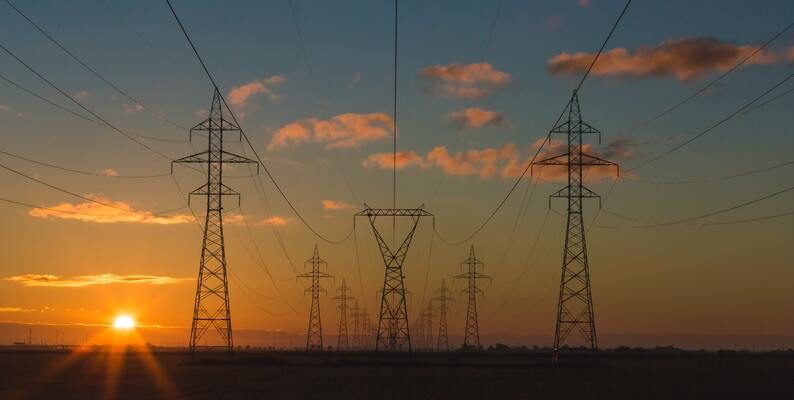

 ## <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> Table of contents: </div>


1. [Introduction](#1)
    1. [Data](#2)
    1. [Goal](#3)
1. [Preparation](#4)
    1. [Customize](#5)
    1. [Importing data and assigning columns formats](#6)
    1. [Exploratory analysis](#7)
    1. [Cleaning and validation](#8)
1. [Visualize trend energy production](#9)    
    1. [General information](#10)
    1. [General trend](#11)
    1. [Source of energy hourly trend](#12)
    1. [Weekday trend](#13)

  

<a id="1"></a> <br>
# <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Introduction </div>

<a id="2"></a> <br>
##  <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1.a Data 🧾 </div>

This data set belongs to ENTSOE-E Transparency Platform and contains Dutch energy generation (in MW) per production type. **The data is updated daily and is always a day behind the current date.**

ENTSOE-E is the European association for the cooperation of transmission system operators (TSOs) for electricity.

👉 Data: https://www.kaggle.com/datasets/maxscheijen/dutch-energy-generation


<a id="3"></a> <br>
##  <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1.b Goal 🔎 </div>

👉 We are looking for daily **general** trends in the data set period. 

👉 Display plots for understanding the energy generation behaviour.

👉 Flexible code in order to run daily.

<a id="4"></a> <br>
#  <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2. Preparation 🛠️</div>


🔨 Firstly, set up the tools we are going to use in the script.

🔨 Secondly, we are to load the data set from the file and have a look to raw data.
   
🔨 Clean missing and outliers values in order to have a general trend.

🔨 Display general information about the data set.

<a id="5"></a> <br>
##  <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2.a - Customize 🤳 </div>

♻️ In the first parte of the this notebook we are going to import modules and define some custom variables and functions, which we use in later.

🔧	Custom variables are gathered in this section.

**Note**: custom variables are defined in function of the data

In [1]:
# Import modules

import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

🔧 Defining custom variables and functions

In [2]:
# variables (windows)

#file name
# kraggle data set
filename = '../input/dutch-energy-generation/dutch-energy.csv'
#local computer
#filename = './data/dutch-energy.csv'

#dictionary change day of the week format
weekdays = {0: ("Monday", "workday", "#808080"),
            1: ("Tuesday","workday","#808080"),
            2: ("Wednesday", "workday","#808080"),
            3: ("Thursday", "workday", "#808080"),
            4: ("Friday", "workday","#808080"),
            5: ("Saturday", "weekend", "#FF00FF"),
            6: ("Sunday", "weekend", "#FF00FF")}

dic_weekdays = {'workday':"#808080",
                'weekend':"#FF00FF"}

#bold format
txt_bold_start = "\033[1m"
txt_bold_ends = "\033[0m"

# visualization
sns.set_context('notebook', font_scale=1.5)

color_graph = '#6576b4'

# custom dictionary for energy sources (remains)
dic_energy = {'energy00': {'name': 'MTU',
                          'color': '#c3b091',
                          'renewable': np.nan
                         },
              'energy01': {'name': 'Fossil Gas',
                          'color': '#c3b091',
                          'renewable': False
                         },
             'energy02': {'name': 'Fossil Hard coal',
                          'color': '#36454F',
                          'renewable': False
                         },
             'energy03': {'name': 'Nuclear',
                          'color':'#b8860b',
                          'renewable': False
                         },
             'energy04': {'name': 'Other',
                          'color': '#9ab973',
                          'renewable': False                       
                         },
             'energy05':  {'name': 'Solar',
                          'color': '#ffff00',
                          'renewable': False                       
                         },
             'energy06': {'name': 'Waste',
                          'color': '#fad6a5' ,
                          'renewable': np.nan                   
                         },
             'energy07': {'name': 'Wind Offshore',
                          'color':  '#000080',
                          'renewable': True                    
                         },
             'energy08': {'name': 'Wind Onshore',
                          'color': '#882d17',
                          'renewable': True
                         }
            
            }

In [3]:
# Dic color for energy type
df_custom = pd.DataFrame.from_dict(dic_energy, orient='index')
dic_Energycolor = dict(zip(df_custom['name'], df_custom['color']))

In [4]:
def missingValues(df_in, dic_color=dict()):
    '''
        Information about missing values in the df

        Parameters
        ----------
        df_in: dataframe
        
        dic_color: dic with color displays
            if it is not define, color from global variable color_graph


        Returns
        -----------
        df_out: dataframe with missing values
             
        
        Note: 
        -----------
        Display plot with missing values per column 
    '''
    # df missing values per
    df_out = df_in.isna().sum()
    
    df_out = df_out[df_out.values != 0]
    
    # figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    if dic_color:
    
        ax = sns.barplot(x = df_missing.index,
                        y = df_missing.values,
                        palette=dic_color
                        )
        ax.bar_label(ax.containers[0])
    
    else:

        df_out.plot(kind='bar', color=color_graph)

    plt.show()
    
    return df_out

In [5]:
def DisplayGeneralInfo(df, dic_color = dict()):
    '''
        Information about df values

        Parameters
        ----------
        df: dataframe
        
        dic_color: dic 

        
        Note: 
        -----------
        Display statistics information by column and boxplot 
    '''
    for col in df.describe().columns:

        print('Describe {0} :\n {1} \n'\
              .format(col, df.describe()[col].round().to_frame().T))
        #fig = px.box(df, x=col)
        #fig.show()
    
    fig, ax = plt.subplots(figsize=(15, 10))
    _ = sns.boxplot(data= df, 
                orient="h",
                palette=dic_color
               )
    plt.show()
    

In [6]:
def DisplayOutliers(df, removeOutliers = False):
    '''
        Information about missing values in the df

        Parameters
        ----------
        df_in: dataframe
        
        removeOutliers: Bool
            True remove outliers
            False keep outlers


        Returns
        -----------
        df: dataframe 
        
        
        Note: 
        -----------
        Display information about the outliers per column 
    '''
    
    for col in df.columns:
        Q01,  Q03 = np.percentile(df[col],[25, 75])
        RIC = Q03-Q01
            
        L_inf = Q01 - 1.5*RIC
        L_sup = Q03 + 1.5*RIC
         
        df_outlier_col = df[(df[col] < L_inf) | (df[col] > L_sup)]

        if df_outlier_col.empty == True: continue
            
        else:
            print('The column {0} has {1} outliers:\n '\
                  .format(col, df_outlier_col.shape[0]))
            print(' values: {0} \n'.format(np.unique(df_outlier_col[col])))
        
        if removeOutliers == True:
            #removing outliers
            df[col] = np.where(df[col]<L_inf, np.nan, df[col])
            df[col] = np.where(df[col]>L_sup, np.nan, df[col])
    
    return df

In [7]:
def PlotTrend(df_in, title=None,  dic_color = dict()):
    '''
        Plot tren 

        Parameters
        ----------
        df_in: dataframe
        
        title: str
        
        color: dic_color 

        Note: 
        -----------
        Display tren plot
    '''
    #set plot date
    #Changing date format
    firstDate = df.index.values.min()
    firstDate = pd.to_datetime(firstDate)

    LastDate =df.index.values.max()
    LastDate = pd.to_datetime(LastDate)

    
    fig, ax = plt.subplots(figsize=(15, 10))
    _ = sns.lineplot(data=df_in, 
                     palette = dic_color,
                     #color = color,
                     dashes=False,
                     linewidth=5
                    )
    _ = plt.title('{0} Trend - Between {1} and {2}'\
                  .format(title, firstDate.date(), LastDate.date()))
    _ = plt.xticks(rotation=45)
    _ = plt.ylabel('Energy (MW)')
    plt.show()

In [8]:
def PlotTrendDaily(df_in, dic_color = dict(), DisplayByDay = True):
    '''
        Plot daily trend 

        Parameters
        ----------
        df_in: dataframe
        
        dic_color: dic_color by line
        
        DisplayByDay: Bool
            True - a line for each weekday (7 lines)
            False - group by workday or weekend (2 lines)

        Note: 
        -----------
        Display daily trend plot
    '''
    #groupby day of the week and hour
    df_daily = df_in.groupby([df_in.index.dayofweek, df_in.index.hour]).first()
    df_daily = df_daily.sum(axis=1)
    
    fig, ax = plt.subplots(figsize=(15, 10))

    #set plot date
    #Changing date format
    firstDate = df_in.index.values.min()
    firstDate = pd.to_datetime(firstDate)

    LastDate =df_in.index.values.max()
    LastDate = pd.to_datetime(LastDate)

    if DisplayByDay == True:
        #Display a line for week day (/ lines)

        _ = sns.lineplot(ax = ax,
                 data = df_daily,
                 x = df_daily.index.get_level_values(1),
                 y = df_daily,
                 #hue = df_daily.index.get_level_values(0),
                 # change numeric value to name of the day 
                 hue = list(map(lambda x: weekdays[x][0], df_daily.index.get_level_values(0))),
                 palette = {value[0]:value[2] for key, value in dic_color.items()},
                 linewidth=5        
                )
    else:
        #Group data in workday and weekend days (2 lines)
        _ = sns.lineplot(ax = ax,
                 data = df_daily,
                 x = df_daily.index.get_level_values(1),
                 y = df_daily,
                 # color by workday or weekend 
                 hue = list(map(lambda x: weekdays[x][1], df_daily.index.get_level_values(0))),
                 palette = dic_color,
                 linewidth=5
                )
        
    _ = plt.title('Weekday trend - Beetween {0} and {1}'.format(firstDate.date(), LastDate.date()))
    _ = plt.xlabel('Hour')
    _ = plt.ylabel('Energy (MW)')

    plt.show()

<a id="6"></a> <br>
## <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2.b - Importing data and assigning columns formats 📂	 </div>

📌 Importing data in Python data frame and assigning type datetime to 'MTU' column

In [9]:
# Import data in Python data frame and assign column 'MTU' datetime format 
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv(filename,
                 parse_dates=['MTU'],
                 date_parser=custom_date_parser)

<a id="7"></a> <br>
##  <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2.c - Exploratory analysis 👁️ </div>

🗳️ General information from the data:
- Number of columns/rows
- Data type
- Missing values
- ...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   MTU                              3936 non-null   datetime64[ns]
 1   Biomass                          3936 non-null   int64         
 2   Fossil Brown coal/Lignite        0 non-null      float64       
 3   Fossil Coal-derived gas          0 non-null      float64       
 4   Fossil Gas                       3936 non-null   int64         
 5   Fossil Hard coal                 3936 non-null   int64         
 6   Fossil Oil                       0 non-null      float64       
 7   Fossil Oil shale                 0 non-null      float64       
 8   Fossil Peat                      0 non-null      float64       
 9   Geothermal                       0 non-null      float64       
 10  Hydro Pumped Storage             0 non-null      float64    

In [11]:
# Understand the variables
df_vbles = pd.DataFrame(columns=['Column','Unique values','Values'])

for i, col in enumerate(df.columns):
    df_vbles.loc[i] = [col, df[col].nunique(), df[col].unique().tolist()]
    
df_vbles 

,Column,Unique values,Values
0,MTU,3936,"[1659572100000000000, 1659573000000000000, 165..."
1,Biomass,1,[0]
2,Fossil Brown coal/Lignite,0,[nan]
3,Fossil Coal-derived gas,0,[nan]
4,Fossil Gas,2822,"[5613, 5425, 5039, 4661, 3833, 3668, 3444, 329..."
5,Fossil Hard coal,1364,"[2747, 2742, 2797, 2805, 2789, 2810, 2784, 278..."
6,Fossil Oil,0,[nan]
7,Fossil Oil shale,0,[nan]
8,Fossil Peat,0,[nan]
9,Geothermal,0,[nan]


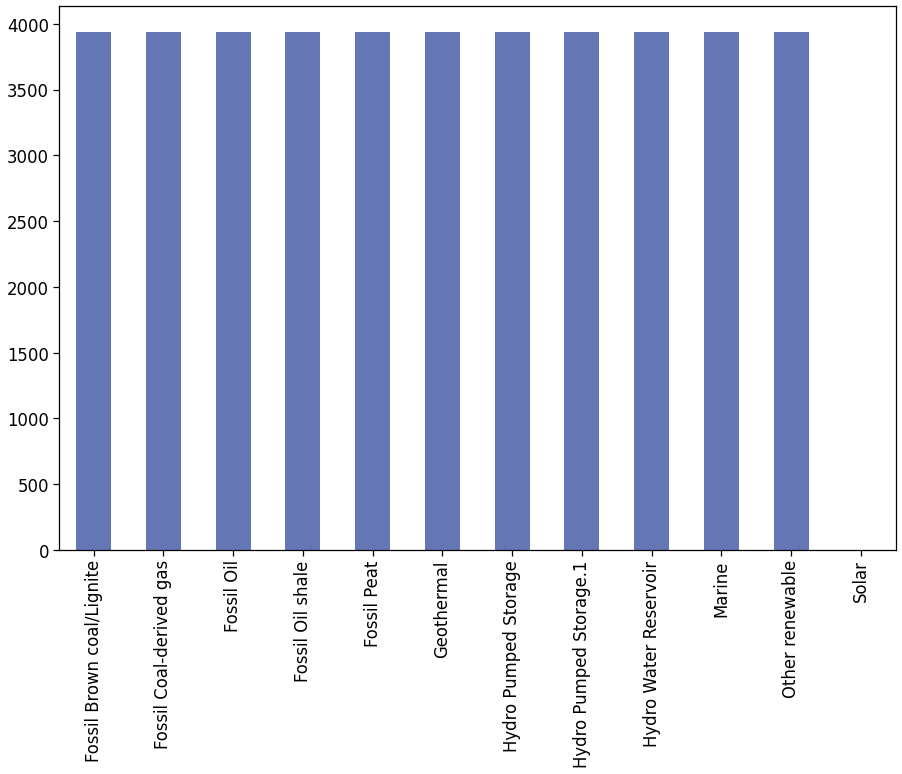

In [12]:
# Using the function missingValues for visualize the missing values
df_missing = missingValues(df)

In [13]:
print('General information about the data frame:\t \n \
       - Number of columns: \t {0} \n \
       - Number of rows: \t {1} \n'.format(df.shape[1], df.shape[0]))

General information about the data frame:	 
        - Number of columns: 	 22 
        - Number of rows: 	 3936 



In [14]:
print('The columns in the data frame are:')
for col in df.columns:
    print(' - {0}'.format(col))

The columns in the data frame are:
 - MTU
 - Biomass
 - Fossil Brown coal/Lignite
 - Fossil Coal-derived gas
 - Fossil Gas
 - Fossil Hard coal
 - Fossil Oil
 - Fossil Oil shale
 - Fossil Peat
 - Geothermal
 - Hydro Pumped Storage
 - Hydro Pumped Storage.1
 - Hydro Run-of-river and poundage
 - Hydro Water Reservoir
 - Marine
 - Nuclear
 - Other
 - Other renewable
 - Solar
 - Waste
 - Wind Offshore
 - Wind Onshore


<a id="8"></a> <br>
##  <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2.d - Cleaning and validation 🧹  </div>

🗑️ Cleaning the data set, removing columns with all nan values and constant values

In [15]:
#Remove columns with all nan values
for data in zip(df_missing.index, df_missing.values):
    #create a boolean in order to remove the column with all values NaN
    Allvalues_nan = df[data[0]].isnull().values.all()
    if Allvalues_nan:
        print('\n Removing column: \t {0}'.format(data[0]))
        del(df[data[0]])


 Removing column: 	 Fossil Brown coal/Lignite

 Removing column: 	 Fossil Coal-derived gas

 Removing column: 	 Fossil Oil

 Removing column: 	 Fossil Oil shale

 Removing column: 	 Fossil Peat

 Removing column: 	 Geothermal

 Removing column: 	 Hydro Pumped Storage

 Removing column: 	 Hydro Pumped Storage.1

 Removing column: 	 Hydro Water Reservoir

 Removing column: 	 Marine

 Removing column: 	 Other renewable


In [16]:
# Remove columns with contants values 
for col in df.columns:
    if len(df[col].unique()) < 2:
        print('\n Removing column: \t {0}'.format(col))
        del(df[col])


 Removing column: 	 Biomass

 Removing column: 	 Hydro Run-of-river and poundage


Describe Fossil Gas :
              count    mean     std  min     25%     50%     75%     max
Fossil Gas  3936.0  3884.0  1951.0  0.0  2138.0  3398.0  5454.0  8276.0 

Describe Fossil Hard coal :
                    count    mean    std  min     25%     50%     75%     max
Fossil Hard coal  3936.0  2735.0  613.0  0.0  2111.0  2844.0  3043.0  3911.0 

Describe Nuclear :
           count   mean  std  min    25%    50%    75%    max
Nuclear  3936.0  463.0  8.0  0.0  463.0  464.0  465.0  469.0 

Describe Other :
         count   mean    std  min   25%    50%    75%    max
Other  3936.0  218.0  215.0  0.0  55.0  126.0  294.0  887.0 

Describe Solar :
         count  mean   std  min  25%  50%   75%    max
Solar  3935.0  32.0  40.0  0.0  0.0  7.0  61.0  113.0 

Describe Waste :
         count  mean    std  min   25%   50%   75%      max
Waste  3936.0  90.0  516.0  0.0  69.0  70.0  71.0  20405.0 

Describe Wind Offshore :
                 count   mean    std  min    25%    50%    75%     max


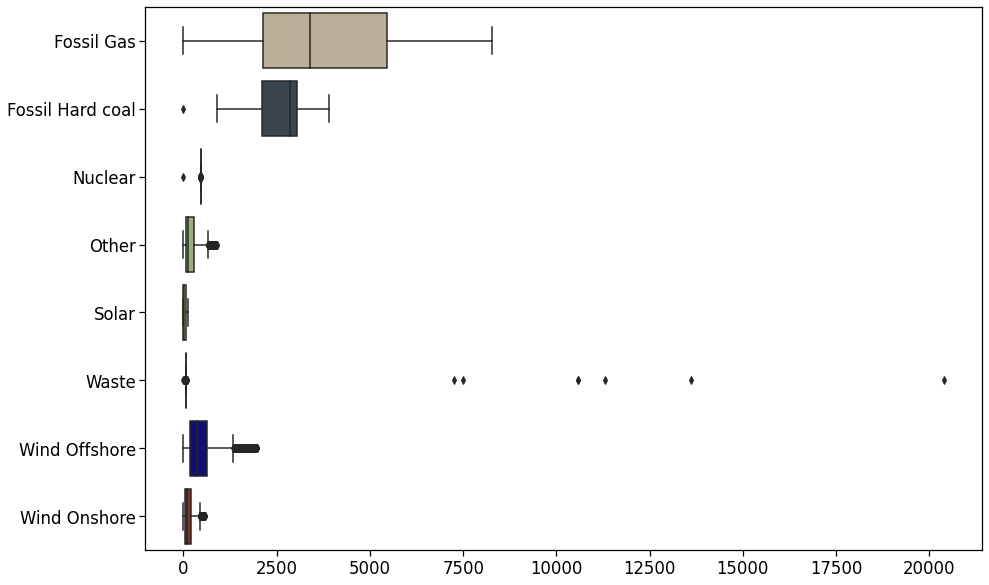

In [17]:
DisplayGeneralInfo(df, dic_color = dic_Energycolor)

In [18]:
# outliers remove the outliers
df = DisplayOutliers(df, removeOutliers = True)

The column Fossil Hard coal has 1 outliers:
 
 values: [0] 

The column Nuclear has 81 outliers:
 
 values: [  0 433 434 435 436 437 439 440 442 445 448 449 450 452 454 457 459 469] 

The column Other has 257 outliers:
 
 values: [656 657 658 661 664 668 670 671 672 674 678 680 684 685 689 691 694 697
 699 702 704 706 708 709 711 712 715 718 720 721 722 723 724 726 727 728
 729 731 733 734 735 737 738 739 740 741 743 744 745 746 748 749 750 752
 753 755 756 757 758 761 762 763 764 765 766 767 768 770 773 774 775 777
 778 779 780 782 784 786 787 788 790 791 792 793 794 795 796 798 800 801
 802 803 805 806 807 809 810 811 812 813 814 815 816 817 818 819 820 821
 823 824 825 827 828 829 830 831 832 833 835 837 838 839 841 842 843 844
 845 846 847 848 849 850 851 852 853 854 855 857 858 860 862 869 874 875
 880 882 886 887] 

The column Waste has 193 outliers:
 
 values: [    0    11    29    41    44    51    52    53    54    55    56    57
    58    59    60    61    62    63    64    6

Describe Fossil Gas :
              count    mean     std  min     25%     50%     75%     max
Fossil Gas  3936.0  3884.0  1951.0  0.0  2138.0  3398.0  5454.0  8276.0 

Describe Fossil Hard coal :
                    count    mean    std    min     25%     50%     75%     max
Fossil Hard coal  3935.0  2735.0  611.0  891.0  2111.0  2844.0  3043.0  3911.0 

Describe Nuclear :
           count   mean  std    min    25%    50%    75%    max
Nuclear  3855.0  464.0  2.0  460.0  463.0  464.0  465.0  468.0 

Describe Other :
         count   mean    std  min   25%    50%    75%    max
Other  3679.0  179.0  161.0  0.0  53.0  109.0  263.0  653.0 

Describe Solar :
         count  mean   std  min  25%  50%   75%    max
Solar  3935.0  32.0  40.0  0.0  0.0  7.0  61.0  113.0 

Describe Waste :
         count  mean  std   min   25%   50%   75%   max
Waste  3743.0  70.0  1.0  66.0  69.0  70.0  71.0  74.0 

Describe Wind Offshore :
                 count   mean    std  min    25%    50%    75%     max


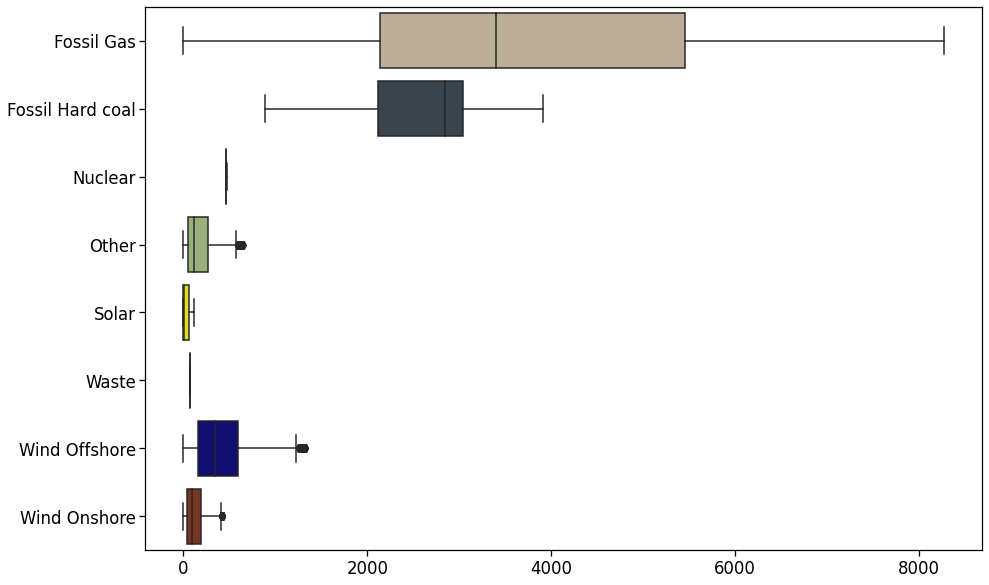

In [19]:
DisplayGeneralInfo(df, dic_color = dic_Energycolor)

In [20]:
print('After cleaning the data set, the remain number of columns are {0} \n columns names:'.format(len(df.columns)))
for col in df.columns:
    print(' - {0}: \n  mean value {1:.2f} MW\n'.format(col, df[col].mean()))

After cleaning the data set, the remain number of columns are 9 
 columns names:
 - MTU: 
  mean value .2f MW

 - Fossil Gas: 
  mean value 3884.12 MW

 - Fossil Hard coal: 
  mean value 2735.23 MW

 - Nuclear: 
  mean value 463.86 MW

 - Other: 
  mean value 178.94 MW

 - Solar: 
  mean value 31.58 MW

 - Waste: 
  mean value 70.15 MW

 - Wind Offshore: 
  mean value 407.14 MW

 - Wind Onshore: 
  mean value 124.42 MW



<a id="9"></a> <br>
# <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 3. Visualize trend energy production 📊 </div>

In [21]:
# New index - 'MTU' column
df.reset_index(inplace=False)
df.set_index('MTU', inplace=True)

In [22]:
#Changing date format
firstDate = df.index.values.min()
firstDate = pd.to_datetime(firstDate)

LastDate =df.index.values.max()
LastDate = pd.to_datetime(LastDate)

print(' First date: \t {0}\n Last date: \t {1}\n'\
      .format(firstDate.date(), LastDate.date()))

print(' Duration of the data set {0}'.format(LastDate.date() - firstDate.date()))

 First date: 	 2022-08-04
 Last date: 	 2022-09-14

 Duration of the data set 41 days, 0:00:00


<a id="10"></a> <br>
# <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 3.a - General information 📋 </div>

In [23]:
#Calculate percentage of energy source
df_general = df.sum(axis=0)
df_percentage = df_general/df_general.sum()
df_percentage.sort_values(ascending=False, inplace=True)


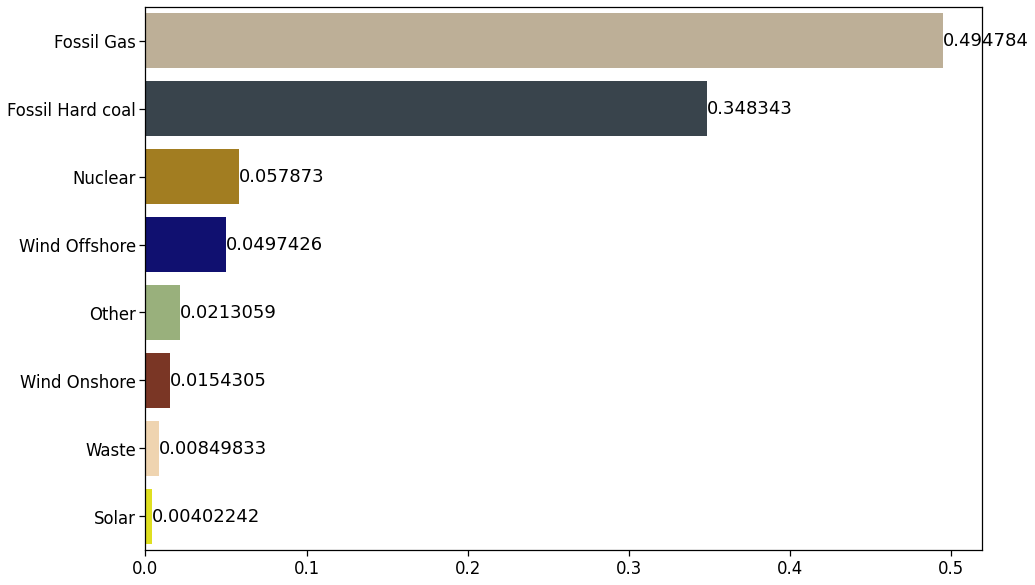

In [24]:
#visualize 
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x = df_percentage.values,
                y = df_percentage.index,
                palette=dic_Energycolor)
ax.bar_label(ax.containers[0])
plt.show()

<a id="11"></a> <br>
# <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 3.b - General trend 📈 </div>

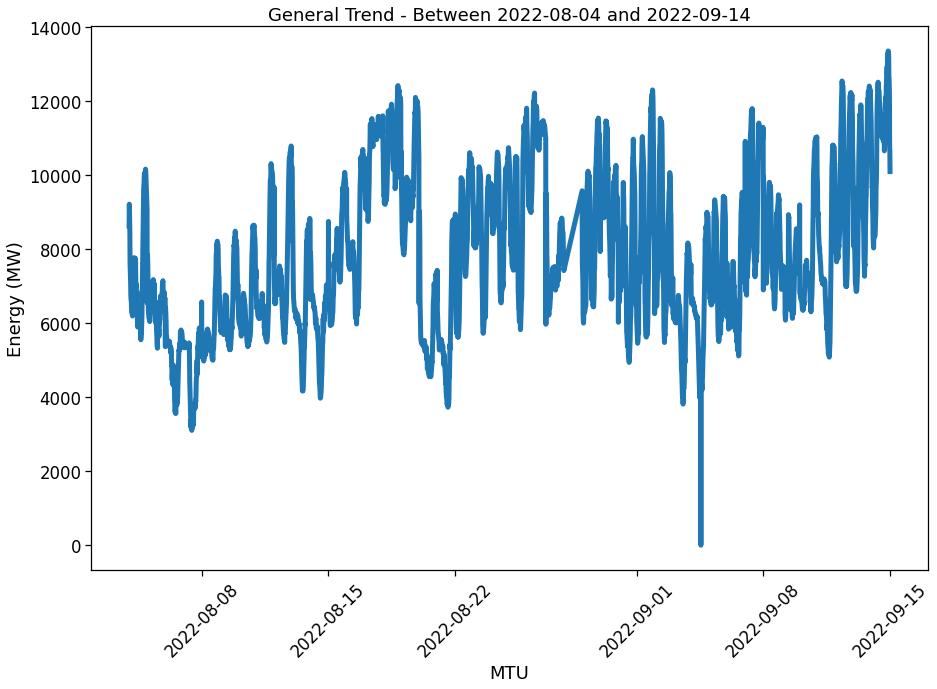

In [25]:
#Plotting trend
PlotTrend(df.sum(axis=1), title='General', dic_color=color_graph)

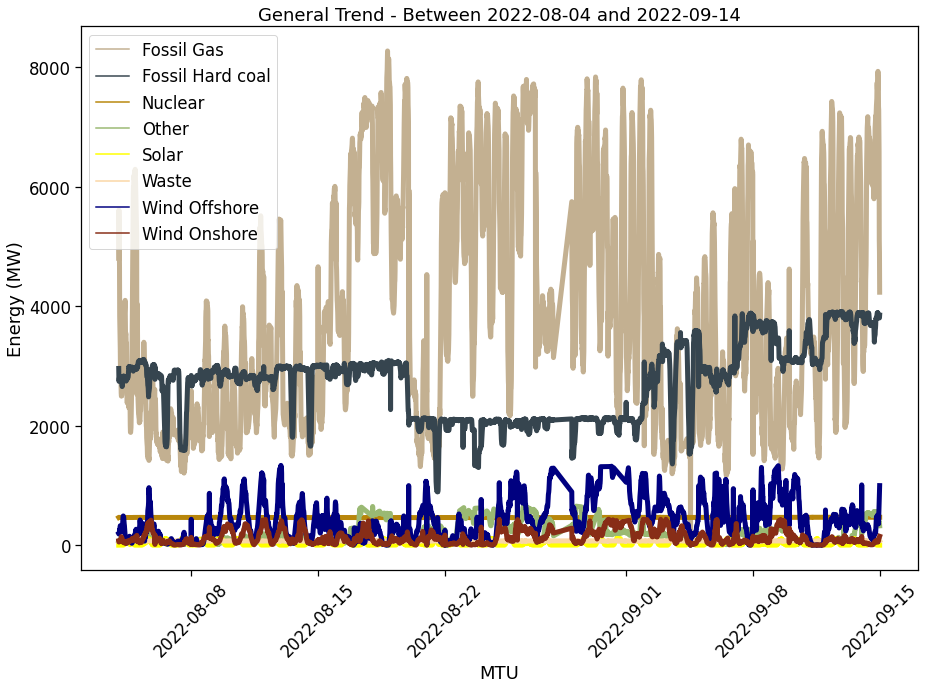

In [26]:
PlotTrend(df, title='General', dic_color= dic_Energycolor)

<a id="12"></a> <br>
# <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 3.c - Source of energy hourly trend ☀️</div>

In [27]:
#group by hour 
df_hourly_energy = df.groupby([df.index.hour]).first()

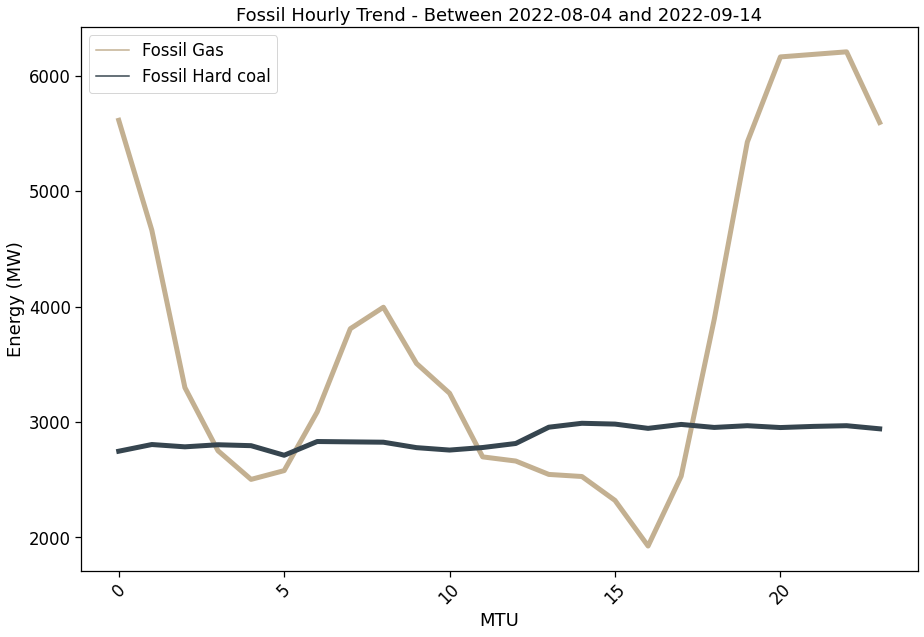

In [28]:
#Fossil trend
PlotTrend(df_hourly_energy[['Fossil Gas', 'Fossil Hard coal']], title='Fossil Hourly', dic_color= dic_Energycolor)

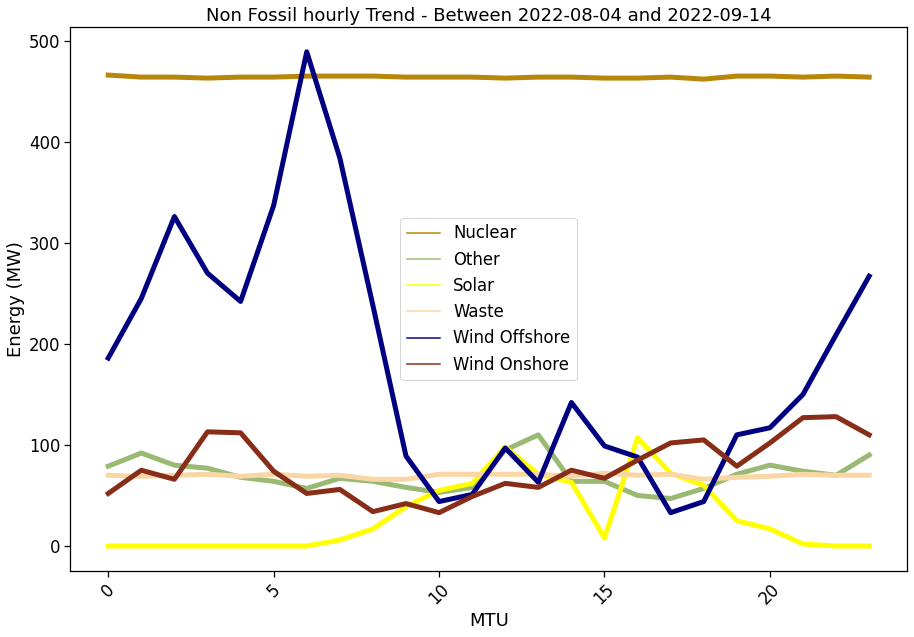

In [29]:
PlotTrend(df_hourly_energy.loc[: , 'Nuclear':'Wind Onshore'], title='Non Fossil hourly', dic_color= dic_Energycolor)

<a id="13"></a> <br>
## <div style="text-align: Left; background-color: #6576b4; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 3.d - Weekday trend 🧗 </div>

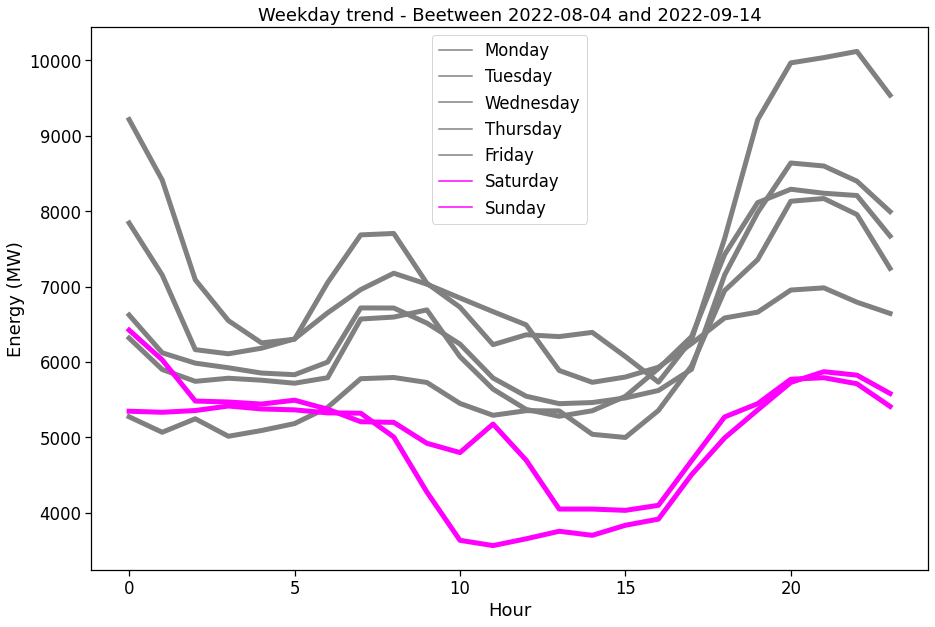

In [30]:
PlotTrendDaily(df, dic_color = weekdays, DisplayByDay = True)

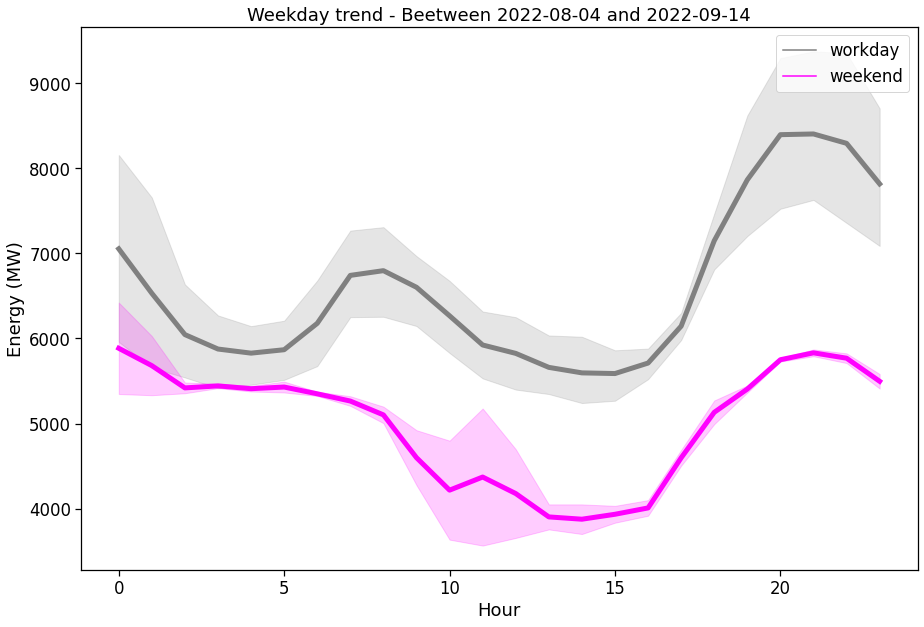

In [31]:
PlotTrendDaily(df, dic_color = dic_weekdays, DisplayByDay = False)

## Thanks for reading! 🐸